## Building My Datasets

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
import os
import matplotlib.pyplot as plt

In [2]:
train_images = []
train_labels = []
char_key = {}

In [3]:
i = 0
for char in os.listdir('train'):
    for file_path in os.listdir("/".join(['train', char])):
        image = cv.imread("/".join(['train', char, file_path]))
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        image = cv.resize(image, (28, 28), interpolation = cv.INTER_AREA)
        image = image.flatten()
        train_images.append(image)
        train_labels.append(i)
    char_key[str(i)] = char
    i += 1

In [4]:
training_images = np.array(train_images)
training_images = 1 - (training_images / 255.0)
training_labels = np.array(train_labels)
print(training_images.shape)
print(training_labels.shape)

(72609, 784)
(72609,)


In [5]:
train_df = pd.DataFrame(training_images)
train_df['class'] = training_labels
train_df.shape

(72609, 785)

In [6]:
train_df.to_csv('train_images.csv', index = False)

In [7]:
with open('letter_key.txt', 'w') as f:
    for key, value in char_key.items():
        f.write(f"{key} {value}\n")

In [8]:
test_images = []
test_labels = []

In [9]:
i = 0
for char in os.listdir('test'):
    for file_path in os.listdir("/".join(['test', char])):
        image = cv.imread("/".join(['test', char, file_path]))
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        image = cv.resize(image, (28, 28), interpolation = cv.INTER_AREA)
        image = image.flatten()
        test_images.append(image)
        test_labels.append(i)
    i += 1

In [18]:
testing_images = np.array(test_images)
testing_images = 1 - (testing_images / 255.0)
testing_labels = np.array(test_labels)
print(testing_images.shape)
print(testing_labels.shape)

(20719, 784)
(20719,)


In [19]:
test_df = pd.DataFrame(testing_images)
test_df['class'] = testing_labels
test_df.shape

(20719, 785)

In [20]:
test_df.to_csv('test_images.csv', index = False)

In [13]:
val_images = []
val_labels = []

In [14]:
i = 0
for char in os.listdir('validation'):
    for file_path in os.listdir("/".join(['validation', char])):
        image = cv.imread("/".join(['validation', char, file_path]))
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        image = cv.resize(image, (28, 28), interpolation = cv.INTER_AREA)
        image = image.flatten()
        val_images.append(image)
        val_labels.append(i)
    i += 1

In [15]:
validation_images = np.array(val_images)
validation_images = 1 - (validation_images / 255.0)
validation_labels = np.array(val_labels)
print(validation_images.shape)
print(validation_labels.shape)

(10463, 784)
(10463,)


In [16]:
val_df = pd.DataFrame(validation_images)
val_df['class'] = validation_labels
val_df.shape

(10463, 785)

In [17]:
val_df.to_csv('validation_images.csv', index = False)

# Training Dataset

In [2]:
big_df_new = pd.read_csv('emnist-byclass-train.csv', header = None)

In [3]:
big_df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
letter_key = dict()
fin = open("letter_key.txt")
for line in fin:
    line = line.strip()
    line = str.split(line, sep = ' ')
    letter_key[line[0]] = line[1]

In [5]:
emnist_key = dict()
fin = open("emnist-byclass-mapping.txt")
for line in fin:
    line = line.strip()
    line = str.split(line, sep = ' ')
    emnist_key[line[0]] = line[1]

In [6]:
letter_key_inv = dict(zip(letter_key.values(), letter_key.keys()))

In [7]:
for i in range(big_df_new.shape[0]):
    big_df_new.iloc[i, 0] = int(letter_key_inv[emnist_key[str(big_df_new.iloc[i, 0])]])

In [8]:
class_labels = big_df_new.pop(big_df_new.columns[0])
big_df_new.columns = range(len(big_df_new.columns))
big_df_new = big_df_new / 255.0
big_df_new = pd.concat([big_df_new, pd.Series(class_labels, name = 'class')], axis = 1)

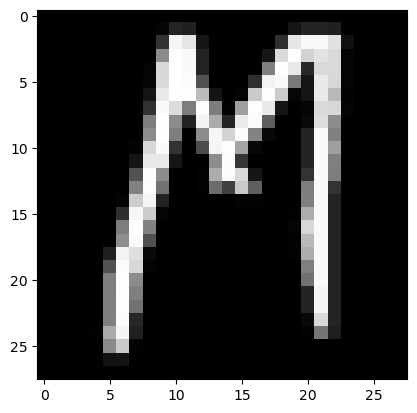

In [10]:
plt.imshow(big_df_new.iloc[4, 0:784].values.reshape(28, 28), cmap = 'gray')
plt.show()

In [11]:
small_df = pd.read_csv('train_images.csv')

In [12]:
small_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.003922,0.031373,0.011765,0.000000,0.003922,0.011765,0.019608,0.011765,0.007843,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.011765,0.015686,0.003922,0.019608,0.015686,0.003922,0.007843,0.011765,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.007843,0.003922,0.000000,0.007843,0.019608,0.011765,0.000000,0.000000,0.003922,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007843,...,0.000000,0.011765,0.000000,0.000000,0.015686,0.011765,0.003922,0.003922,0.023529,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.031373,0.000000,0.000000,0.023529,0.007843,0.000000,0.000000,0.003922,0.000000,0


In [13]:
small_df.columns = list(range(784)) + ['class']

In [19]:
small_df.columns

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           775,     776,     777,     778,     779,     780,     781,     782,
           783, 'class'],
      dtype='object', length=785)

In [22]:
big_df_new.shape

(697932, 785)

In [23]:
small_df.shape

(72609, 785)

In [24]:
full_df = pd.concat([big_df_new, small_df])

In [25]:
full_df.shape

(770541, 785)

In [27]:
full_df.to_csv('full_train.csv', index = False)

# Testing Dataset

In [28]:
test_df = pd.read_csv('emnist-byclass-test.csv', header = None)

In [30]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
for i in range(test_df.shape[0]):
    test_df.iloc[i, 0] = int(letter_key_inv[emnist_key[str(test_df.iloc[i, 0])]])
    test_df.iloc[i, 1:] = np.transpose(test_df.iloc[i, 1:].values.reshape(28, 28)).reshape(784,)

In [50]:
class_labels = test_df.pop(test_df.columns[0])
test_df.columns = range(len(test_df.columns))
test_df = test_df / 255.0
test_df = pd.concat([test_df, pd.Series(class_labels, name = 'class')], axis = 1)

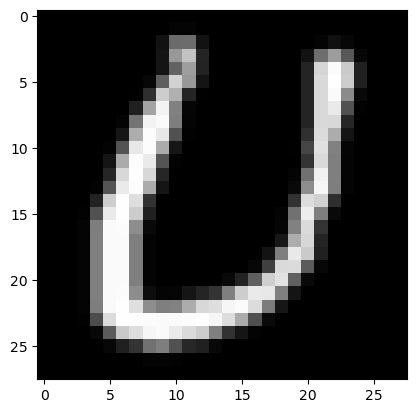

In [56]:
plt.imshow(test_df.iloc[5, 0:784].values.reshape(28, 28), cmap = 'gray')
plt.show()

In [57]:
small_df = pd.read_csv('test_images.csv')

In [58]:
small_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.011765,0.007843,0.000000,0.0,0.003922,0.027451,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007843,...,0.0,0.0,0.0,0.000000,0.003922,0.003922,0.0,0.007843,0.039216,0


In [59]:
small_df.columns = list(range(784)) + ['class']

In [60]:
small_df.columns

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           775,     776,     777,     778,     779,     780,     781,     782,
           783, 'class'],
      dtype='object', length=785)

In [61]:
test_df.shape

(116323, 785)

In [62]:
small_df.shape

(20719, 785)

In [63]:
full_df = pd.concat([test_df, small_df])

In [64]:
full_df.shape

(137042, 785)

In [65]:
full_df.to_csv('full_test.csv', index = False)